# 题目

测试数据：[100,3,28,38,200,30,1,49,2,600,52,232,66,99,2,69,420,59,77,87,93,212]    
对六大算法进行统计测试，按照时间序列从小到大排序。   
运行时间结果比较： 希尔排序<插入排序<冒泡排序<选择排序<归并排序<快速排序

# 算法思想

<font color=red size=5> 冒泡：双循环遍历 </font>    
<font color=red size=5> 选择：双循环遍历+引入单下标 </font>     
<font color=red size=5> 插入：阶梯遍历+引入临时单下标 </font>    
<font color=red size=5> 希尔：阶梯遍历+引入梯度下降增量</font>    
<font color=red size=5> 快速：引入基准依次递归 </font>    
<font color=red size=5> 归并：先递归分割，再递归返回 </font> 

# 冒泡排序

冒泡排序是一种简单的排序算法，它也是一种稳定排序算法。其实现原理是重复扫描待排序序列，并比较每一对相邻的元素，当该对元素顺序不正确时进行 交换。一直重复这个过程，直到没有任何两个相邻元素可以交换，就表明完成了排序。    

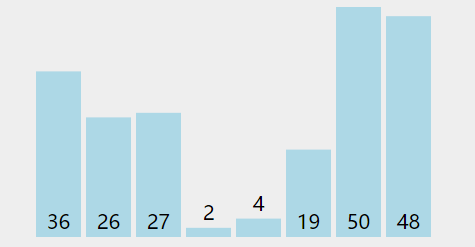

In [20]:
def bubbleSort(s1):
    n=len(s1)
    for i in range(n-1):            #比较n-1轮
        for j in range(n-i-1):    #倒序：每轮比较n-i-1次；正序：range（i，n-1）
            if s1[j]>s1[j+1]:
                c1=s1[j]
                s1[j]=s1[j+1]
                s1[j+1]=c1           #s1[j],s1[j+1]=s1[j+1],s1[j]
s1=[100,3,28,38,200,30,1,49,2,600,52,232,66,99,2,69,420,59,77,87,93,212]
print('排序前的数列：',s1)
%timeit  bubbleSort(s1)
print('排序后的数列：',s1)

排序前的数列： [100, 3, 28, 38, 200, 30, 1, 49, 2, 600, 52, 232, 66, 99, 2, 69, 420, 59, 77, 87, 93, 212]
32.6 µs ± 1.24 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
排序后的数列： [1, 2, 2, 3, 28, 30, 38, 49, 52, 59, 66, 69, 77, 87, 93, 99, 100, 200, 212, 232, 420, 600]


# 选择排序

选择排序是一种简单直观的排序算法，无论什么数据进去都是 O(n²) 的时间复杂度。所以用到它的时候，数据规模越小越好。唯一的好处可能就是不占用额外的内存空间了吧。    
算法步骤:     
首先在未排序序列中找到最小（大）元素，存放到排序序列的起始位置。    
再从剩余未排序元素中继续寻找最小（大）元素，然后放到已排序序列的末尾。    
重复第二步，直到所有元素均排序完毕。

In [19]:
def SelectSort(arr):
    n=len(arr)
    if n==1:
        return 1
    for i in range(n-1):                #比较n-1轮
        mid=i                           #获得每次循环第一个比较值得下标
        for j in range(i,n-1):           #每次循环里寻找最小值，正序：每轮比较n-i-1次
            if arr[mid]>arr[j+1]:       #循环过程判断最小值
                mid=j+1                 #获取更小值得下标
        arr[i],arr[mid]=arr[mid],arr[i]  #把最小的放到最前
s1=[100,3,28,38,200,30,1,49,2,600,52,232,66,99,2,69,420,59,77,87,93,212]
print('排序前的数列：',s1)
%timeit  SelectSort(s1)
print('排序后的数列：',s1)

排序前的数列： [100, 3, 28, 38, 200, 30, 1, 49, 2, 600, 52, 232, 66, 99, 2, 69, 420, 59, 77, 87, 93, 212]
34.5 µs ± 1.69 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
排序后的数列： [1, 2, 2, 3, 28, 30, 38, 49, 52, 59, 66, 69, 77, 87, 93, 99, 100, 200, 212, 232, 420, 600]


# 插入排序

一、概念及其介绍
插入排序(InsertionSort)，一般也被称为直接插入排序。

对于少量元素的排序，它是一个有效的算法。插入排序是一种最简单的排序方法，它的基本思想是将一个记录插入到已经排好序的有序表中，从而一个新的、记录数增 1 的有序表

。在其实现过程使用双层循环，外层循环对除了第一个元素之外的所有元素，内层循环对当前元素前面有序表进行待插入位置查找，并进行移动。

二、适用说明
插入排序的平均时间复杂度也是$O(n^2)$，空间复杂度为常数阶$O(1)$，具体时间复杂度和数组的有序性也是有关联的。

插入排序中，当待排序数组是有序时，是最优的情况，只需当前数跟前一个数比较一下就可以了，这时一共需要比较 N-1 次，时间复杂度为$O(N)$。最坏的情况是待排序数组是逆序的，此时需要比较次数最多，最坏的情况是$O(n^2)$。

三、过程图示
假设前面 n-1(其中 n>=2)个数已经是排好顺序的，现将第 n 个数插到前面已经排好的序列中，然后找到合适自己的位置，使得插入第n个数的这个序列也是排好顺序的。

按照此法对所有元素进行插入，直到整个序列排为有序的过程，称为插入排序。

In [18]:
def InsertSort(arr):
    n=len(arr)
    if n==1:
        return 1
    for i in range(1,n):            #n-1轮
        c1=arr[i]                   #获取当前未排序的值
        j=i
        while j>0 and c1<arr[j-1]:  #在前面排序里插入值，第i轮比较i次
            arr[j]=arr[j-1]         #把大数往后移动1位
            j-=1
        arr[j]=c1                   #把最小数放在当前轮前面
s1=[100,3,28,38,200,30,1,49,2,600,52,232,66,99,2,69,420,59,77,87,93,212]
print('排序前的数列：',s1)
%timeit  InsertSort(s1)
print('排序后的数列',s1)

排序前的数列： [100, 3, 28, 38, 200, 30, 1, 49, 2, 600, 52, 232, 66, 99, 2, 69, 420, 59, 77, 87, 93, 212]
4.61 µs ± 158 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
排序后的数列 [1, 2, 2, 3, 28, 30, 38, 49, 52, 59, 66, 69, 77, 87, 93, 99, 100, 200, 212, 232, 420, 600]


# 希尔排序

每轮比较后各后阶梯增量组比前阶梯增量大！两两交换后将min移入最前面。
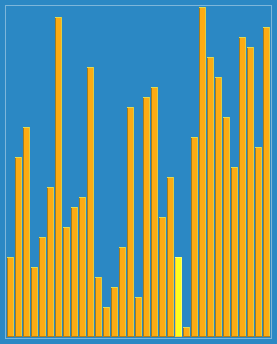
一、概念及其介绍
希尔排序(Shell Sort)是插入排序的一种，它是针对直接插入排序算法的改进。

希尔排序又称缩小增量排序，因 DL.Shell 于 1959 年提出而得名。

它通过比较相距一定间隔的元素来进行，各趟比较所用的距离随着算法的进行而减小，直到只比较相邻元素的最后一趟排序为止。

二、适用说明
希尔排序时间复杂度是$O(n^{1.3-2})$，空间复杂度为常数阶$O(1)$。希尔排序没有时间复杂度为$O(n(logn))$ 的快速排序算法快 ，因此对中等大小规模表现良好，但对规模非常大的数据排序不是最优选择，总之比一般$O(n^2 )$复杂度的算法快得多。

三、过程图示
希尔排序目的为了加快速度改进了插入排序，交换不相邻的元素对数组的局部进行排序，并最终用插入排序将局部有序的数组排序。

在此我们选择增量 gap=length/2，缩小增量以 gap = gap/2 的方式，用序列 {n/2,(n/2)/2...1} 来表示。

如图示例：

（1）初始增量第一趟 gap = length/2 = 4

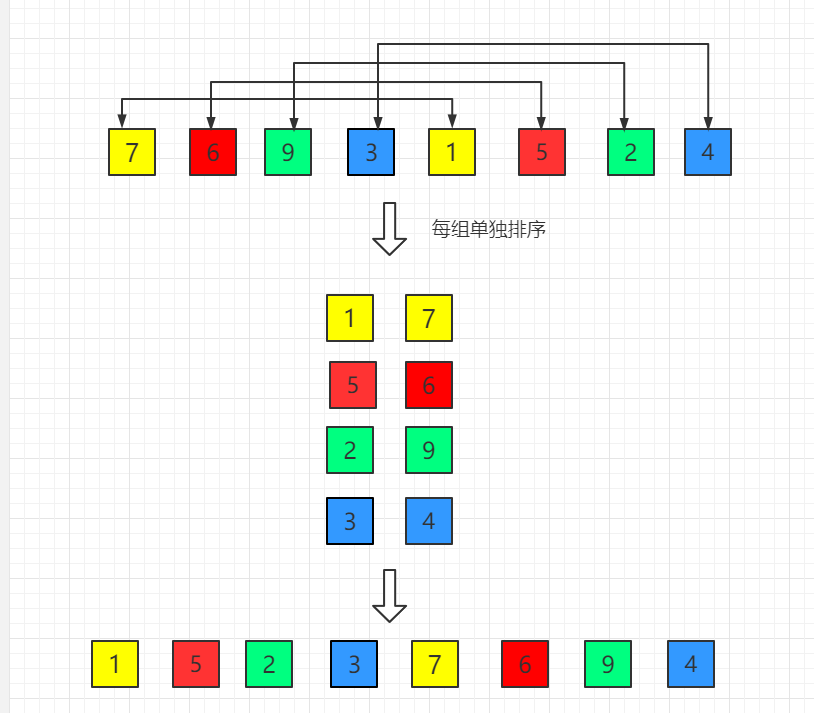
（2）第二趟，增量缩小为 2
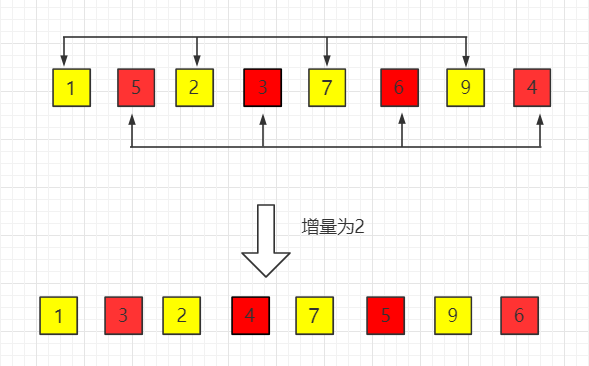
（3）第三趟，增量缩小为 1,得到最终排序结果
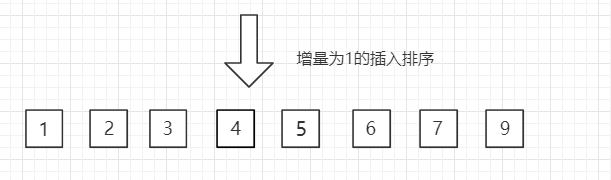

In [4]:
#原创调整！！！
def SellSort(arr):
    n=len(arr)
    endi=0                         #最后修改下标
    if n==1 :
        return 1
    space=n//2                 #从列表中二分之一位置作为增量，换成n//3+1效率更高！
    while space> 0:               #n//2大轮,space==1结束
        print('space=%d:'%(space))
        for i in range(space):   #控制一个间隔循环几次，每大轮当前space次小轮
            key=arr[i]
            j=0                  #每个元素控制比较次数
            print('第%d小轮'%(i))
            while i+(j+1)*space<n : #每小轮按增量间隔遍历所有次数比较
                print('交换开始下标数%d，交换结束%d'%(i+j*space,i+(j+1)*space))
                if space>1 :
                    if arr[i+j*space]>arr[i+(j+1)*space]: #两两交换
                        arr[i+j*space],arr[i+(j+1)*space]=arr[i+(j+1)*space],arr[i+j*space]
                        if arr[i]>arr[i+j*space]: #每次将min移到最前面
                            arr[i],arr[i+j*space]=arr[i+j*space],arr[i]
                     
                else:              #当增量为1时，相邻元素比较，遍历所有
                    if arr[j]>arr[j+1]:
                        arr[j],arr[j+1]=arr[j+1],arr[j]
                j+=1       
            print(arr)
        space-=1
              
s1=[100,2,28,30,1,49,2]
print('排序前的数列：',s1)
SellSort(s1)
print('排序后的数列',s1)

排序前的数列： [100, 2, 28, 30, 1, 49, 2]
space=3:
第0小轮
交换开始下标数0，交换结束3
交换开始下标数3，交换结束6
[2, 2, 28, 30, 1, 49, 100]
第1小轮
交换开始下标数1，交换结束4
[2, 1, 28, 30, 2, 49, 100]
第2小轮
交换开始下标数2，交换结束5
[2, 1, 28, 30, 2, 49, 100]
space=2:
第0小轮
交换开始下标数0，交换结束2
交换开始下标数2，交换结束4
交换开始下标数4，交换结束6
[2, 1, 2, 30, 28, 49, 100]
第1小轮
交换开始下标数1，交换结束3
交换开始下标数3，交换结束5
[2, 1, 2, 30, 28, 49, 100]
space=1:
第0小轮
交换开始下标数0，交换结束1
交换开始下标数1，交换结束2
交换开始下标数2，交换结束3
交换开始下标数3，交换结束4
交换开始下标数4，交换结束5
交换开始下标数5，交换结束6
[1, 2, 2, 28, 30, 49, 100]
排序后的数列 [1, 2, 2, 28, 30, 49, 100]


In [2]:
#标准答案
def SellSort(arr): 
    n = len(arr)
    gap = n//2  
    while gap > 0: 
        for i in range(gap,n): 
            temp = arr[i] 
            j = i 
            while  j >= gap and arr[j-gap] >temp: 
                arr[j] = arr[j-gap] 
                j -= gap 
            arr[j] = temp 
        gap = gap//2
s1=[100,3,28,38,200,30,1,49,2,600,52,232,66,99,2,69,420,59,77,87,93,212]
print('排序前的数列：',s1)
%timeit  SellSort(s1)
print('排序后的数列',s1)

排序前的数列： [100, 3, 28, 38, 200, 30, 1, 49, 2, 600, 52, 232, 66, 99, 2, 69, 420, 59, 77, 87, 93, 212]
15.4 µs ± 512 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
排序后的数列 [1, 2, 2, 3, 28, 30, 38, 49, 52, 59, 66, 69, 77, 87, 93, 99, 100, 200, 212, 232, 420, 600]


# 快速排序

快速排序之所以比较快，递归需要大量空间临时存储，牺牲空间换时间，因为与冒泡排序相比，每次的交换时跳跃式的，每次排序的时候设置一个基准点，将小于等于基准点的数全部放到基准点的左边，将大于等于基准点的数全部放到基准点的右边。这样在每次交换的时候就不会像冒泡排序一样每次只能在相邻的数之间进行交换，交换的距离就大的多了。因此总的比较和交换次数就少了，速度自然就提高了。当然在最坏的情况下，仍可能是相邻的两个数进行了交换。因此快速排序的最差时间复杂度和冒泡排序是一样的都是$O(n^2)$，它的平均时间复杂度为$O(nlog_2n)$。
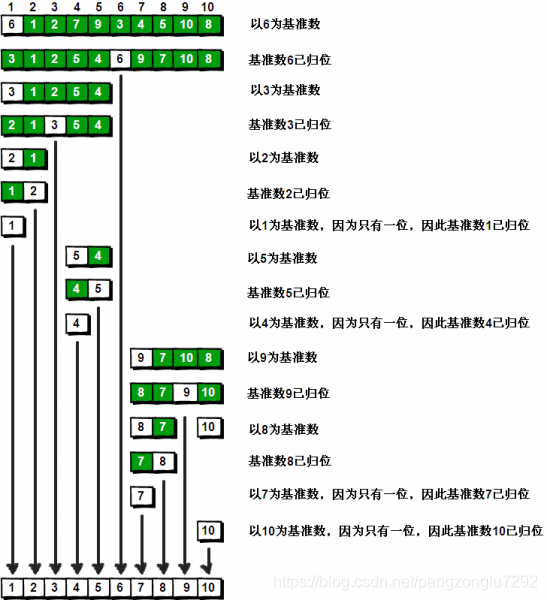

In [5]:
def MovePivot(arr,low,high):
    Pivot=arr[high]               #取最右边一个值
    imove=(low-1)                 #从最左边减1开始
    for i in range(low,high):
        if arr[i]<=Pivot:        
            imove+=1             #记录最近一个交换值下标
            arr[imove],arr[i]=arr[i],arr[imove]   #大的放后面，小的放imove处
    arr[imove+1],arr[high]=arr[high],arr[imove+1] #最后一次，把Pivot值放到imove+1处（分界处）
    return imove+1
def QuickSort(arr,low,high):
    if low<high:
        pivot=MovePivot(arr,low,high)
        QuickSort(arr,low,pivot-1)    #前半
        QuickSort(arr,pivot+1,high)   #后半
s1=[100,3,28,38,200,30,1,49,2,600,52,232,66,99,2,69,420,59,77,87,93,212]
print('排序前的数列',s1)
h=len(s1)
%timeit  QuickSort(s1,0,h-1)
print('排序后的数列',s1)

排序前的数列 [100, 3, 28, 38, 200, 30, 1, 49, 2, 600, 52, 232, 66, 99, 2, 69, 420, 59, 77, 87, 93, 212]
72.6 µs ± 2.44 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
排序后的数列 [1, 2, 2, 3, 28, 30, 38, 49, 52, 59, 66, 69, 77, 87, 93, 99, 100, 200, 212, 232, 420, 600]


# 归并排序

一、概念及其介绍
归并排序（Merge sort）是建立在归并操作上的一种有效、稳定的排序算法，该算法是采用分治法(Divide and Conquer）的一个非常典型的应用。将已有序的子序列合并，得到完全有序的序列；即先使每个子序列有序，再使子序列段间有序。若将两个有序表合并成一个有序表，称为二路归并。

二、适用说明
当有 n 个记录时，需进行 logn 轮归并排序，每一轮归并，其比较次数不超过 n，元素移动次数都是 n，因此，归并排序的时间复杂度为 O(nlogn)。归并排序时需要和待排序记录个数相等的存储空间，所以空间复杂度为 O(n)。

归并排序适用于数据量大，并且对稳定性有要求的场景。

三、过程图示
归并排序是递归算法的一个实例，这个算法中基本的操作是合并两个已排序的数组，取两个输入数组 A 和 B，一个输出数组 C，以及三个计数器 i、j、k，它们初始位置置于对应数组的开始端。

A[i] 和 B[j] 中较小者拷贝到 C 中的下一个位置，相关计数器向前推进一步。

当两个输入数组有一个用完时候，则将另外一个数组中剩余部分拷贝到 C 中。
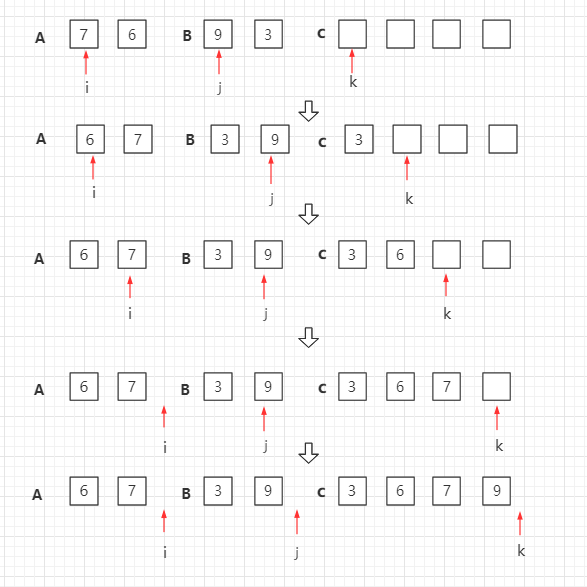
自顶向下的归并排序，递归分组图示：
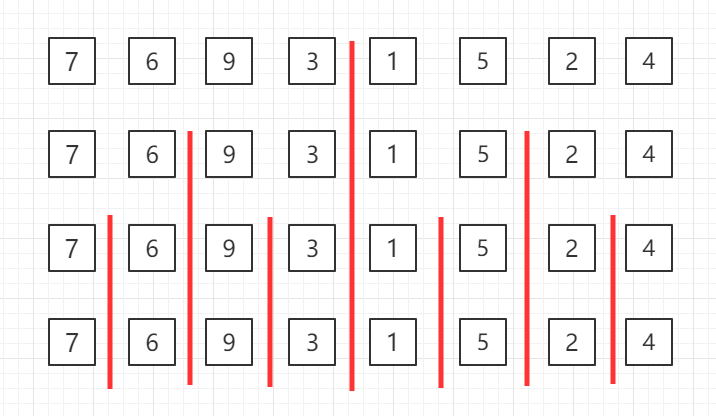
对第三行两个一组的数据进行归并排序
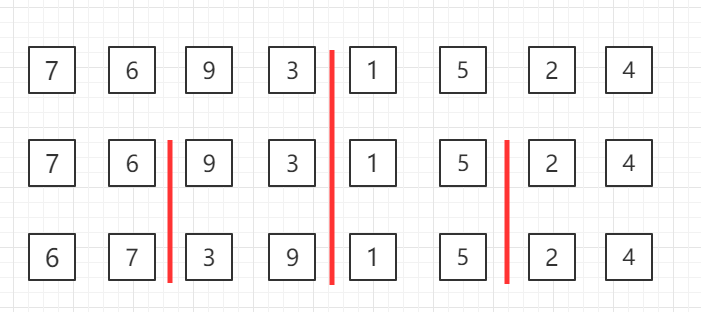
对第二行四个一组的数据进行归并排序
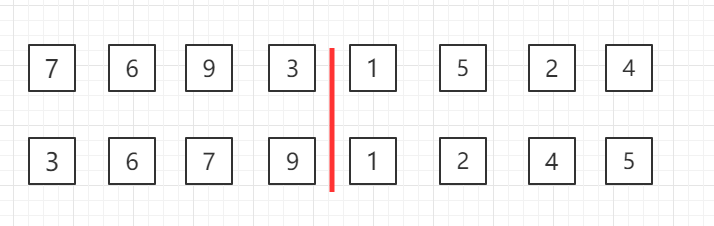
整体进行归并排序
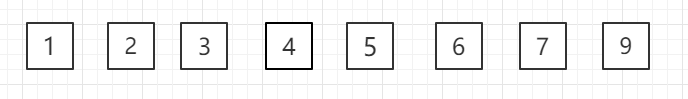

In [14]:
def MergeSort(arr):   
    if len(arr) <= 1:              #当长度为1时，并归结束
        return arr
    mid=len(arr)//2                #对半方式并归
    left = MergeSort(arr[:mid])    #递归方法并归左边列表
    right = MergeSort(arr[mid:])   #递归方法并归右边列表
    return Merge(left, right)      #并归并返回结果
def Merge(left,right):             #对两部分数组进行并归
    r, l=0, 0
    temp=[]                        #临时列表记录归并过程
    lmax=len(left)
    rmax=len(right)
    while l<lmax and r<rmax:
        if left[l] <= right[r]:    #小于等于的
            temp.append(left[l])   #放左边
            l += 1
        else:
            temp.append(right[r])  #大于的放右边
            r += 1
    temp += list(left[l:])
    temp += list(right[r:])
    #print(temp)                   #输出并归结果
    return temp
s1=[100,3,28,38,200,30,1,49,2,600,52,232,66,99,2,69,420,59,77,87,93,212]
print('排序前的数列',s1)
%timeit  MergeSort(s1)
print('排序后的数列',MergeSort(s1))

排序前的数列 [100, 3, 28, 38, 200, 30, 1, 49, 2, 600, 52, 232, 66, 99, 2, 69, 420, 59, 77, 87, 93, 212]
56.1 µs ± 2.38 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
排序后的数列 [1, 2, 2, 3, 28, 30, 38, 49, 52, 59, 66, 69, 77, 87, 93, 99, 100, 200, 212, 232, 420, 600]


# 题目练习2：
按从大到小插入排序处理以下数据：    
[9,29,3,28,200,48,2,89,100,25,36]

In [12]:
def InsertSort(arr):
    n=len(arr)
    if n==1:
        return 1
    for i in range(1,n):            #n-1轮
        c1=arr[i]                   #获取当前未排序的值
        j=i
        while j>0 and c1>arr[j-1]: #排序里插入值，第i轮比较i次
            arr[j]=arr[j-1]         #把大数往后移动1位
            j-=1
        arr[j]=c1                   #把最小数放在当前轮前面
s1=[9,29,3,28,200,48,2,89,100,25,36]
print('排序前的数列：',s1)
InsertSort(s1)
print('排序后的数列',s1)

排序前的数列： [9, 29, 3, 28, 200, 48, 2, 89, 100, 25, 36]
排序后的数列 [200, 100, 89, 48, 36, 29, 28, 25, 9, 3, 2]
